# Building Custom Racing Tracks
By: Matt Post '22 ||
Lafayette College, Dept. Mechanical Engineering ||
AY: 2021-2022

This is a notebook to create a series of functions to be able to build a "test" race track for the Lafayette Motorsports Laptime Simulator Project (or a Sumo Race track for ME 480). The fillTrack function has been provided by Prof. Alexander Brown.

In [2]:
function [track] = fillTrack(S,K)
    nu(1) = 0;
    X(1) = 0;
    Y(1) = 0;
    %build a high resolution map
    Sq = 0:.001:max(S);
    Kq = interp1(S,K,Sq);

    for k = 2:length(Sq)
       nu(k) = nu(k-1)+Kq(k-1)*(Sq(k)-Sq(k-1));
       X(k) = X(k-1) + (Sq(k)-Sq(k-1))*cos(nu(k-1));
       Y(k) = Y(k-1) + (Sq(k)-Sq(k-1))*sin(nu(k-1));
    end

    track.heading = nu;
    track.X = X;
    track.Y = Y;
    track.S = Sq;
    track.K = Kq;
end

The first function we wish to create is an initialize function. This function will initialize empty arrays for station and curviture and will prepopulate the vectors with values of 0 for the first station point. This will be useful in our overall buildTrack function which will build our total track for a series of desired lengths and curvitures.

In [4]:
function [S,K] = initializeTrack()
    S = []; % initialize vectors
    K = [];
    S(1) = 0; % prepopulate with values of 0 for initial station point
    K(1) = 0;
end

We will preform a unit test to make sure the function behaves as we expect. In this case we will expect vectors with length 1 and values of 0 for curviture to be returned.

In [5]:
[S_int,K_int] = initializeTrack() % values of 0
length(S_int) % expect 1
length(K_int) % expect 1

S_int = 0
K_int = 0
ans =  1
ans =  1


Now we will construct will be a addStraight function which will append our station array with two new points with a straight section to our new race track. The function requires the current station array, current curviture array, length of the straight we want to add, and the curviture of the straight (should be 0). The function returns the appended station and curviture arrays with our new points added. 

In [6]:
function [S,K] = addStraight(S_current,K_current,lengthStraight,KStraight)
    N = length(S_current);
    fudge = 0.001;
    S_current(N+1) = S_current(N)+fudge;
    K_current(N+1) = KStraight;
    S_current(N+2) = S_current(N+1)+lengthStraight+fudge;
    K_current(N+2) = KStraight;
    S = S_current;
    K = K_current;
end

Quick unit test to make sure addStraight works. We expect a straight line from station = 0 to station = ~10 to be plotted.

S =

    0.00000    0.00100   10.00200

K =

   0   0   0



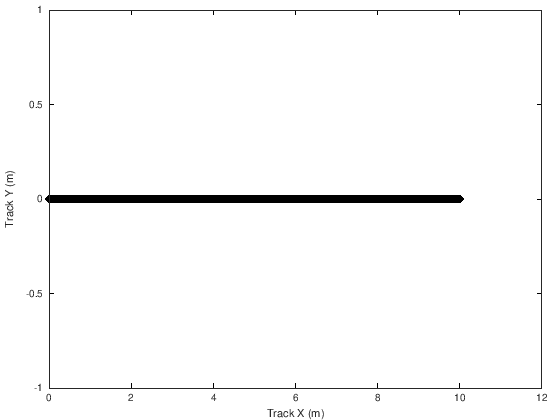

In [30]:
[S,K]=initializeTrack();
lengthStraight = 10;
K_straight = 0;
[S,K] = addStraight(S, K,lengthStraight,K_straight)

track = fillTrack(S,K);

%look at our track
figure
plot(track.X,track.Y,'ko')

xlabel('Track X (m)')
ylabel('Track Y (m)')

Now that we have a function to add a straight we want to create a function that will allow us to add turns to our track (straights alone are boring!). Like above this function requires the current station array, current curviture array, and the curviture of the turn. However, this function will also require the *length* of the turn. The function returns the appended station and curviture arrays with our new points added. 

In [38]:
function [S,K] = addTurn(S_cur,K_cur,RTurn,thetaTurn)
    N = length(S_cur);
    fudge = 0.001;
    KTurn = 1/RTurn;
    STurn = abs(thetaTurn*RTurn);
    S_cur(N+1) = S_cur(N)+fudge;
    S_cur(N+2) = S_cur(N+1)+STurn+fudge;
    
    if thetaTurn <=0
        K_cur(N+1) = -KTurn;
        K_cur(N+2) = -KTurn;
    else
        K_cur(N+1) = KTurn;
        K_cur(N+2) = KTurn;  
    end
    S = S_cur;
    K = K_cur;
end

Unit test again. We're expecting to see two half circles one starting at Y = 0 and going to Y = -2 and one starting at Y = 0 and going to Y = 2.

S = 0
K = 0
S =

   0.00000   0.00100   3.14359

K =

   0  -1  -1

S2 = 0
K2 = 0
S2 =

   0.00000   0.00100   3.14359

K2 =

   0   1   1



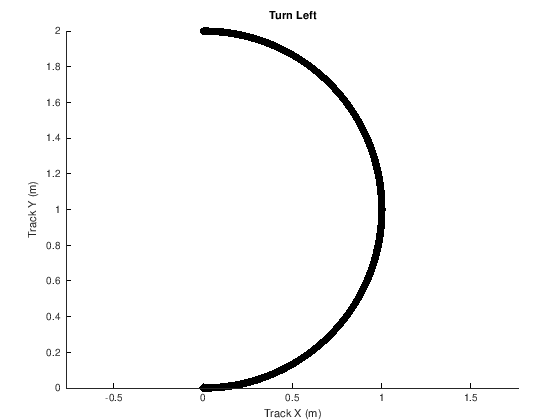

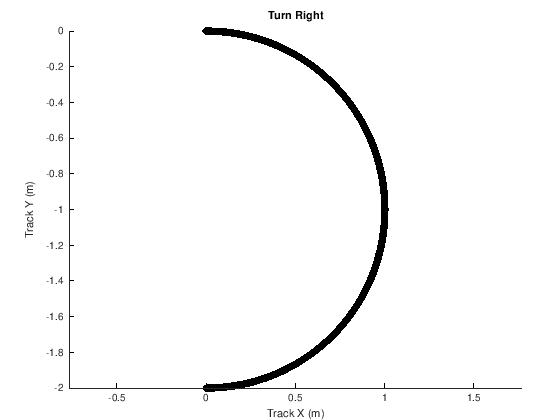

In [69]:
[S,K] = initializeTrack()
RTurn = 1;
theta_turn = -pi;

[S,K] = addTurn(S, K,RTurn,theta_turn)

%look at our track
track = fillTrack(S,K);
figure()
hold on
title("Turn Right")
plot(track.X,track.Y,'ko')
axis equal
xlabel('Track X (m)')
ylabel('Track Y (m)')


[S2,K2] = initializeTrack()
RTurn = 1;
theta_turn2 = pi;

[S2,K2] = addTurn(S2, K2,RTurn,theta_turn2)
track2 = fillTrack(S2,K2);
figure()
hold on
title("Turn Left")
plot(track2.X,track2.Y,'ko')
axis equal
xlabel('Track X (m)')
ylabel('Track Y (m)')

Before contuining we are going to manually create a small track making use of three functions to see if they work together and get our desired results. We're expecting to see a track which has two straights and two 180 degree turns.

S = 0
K = 0


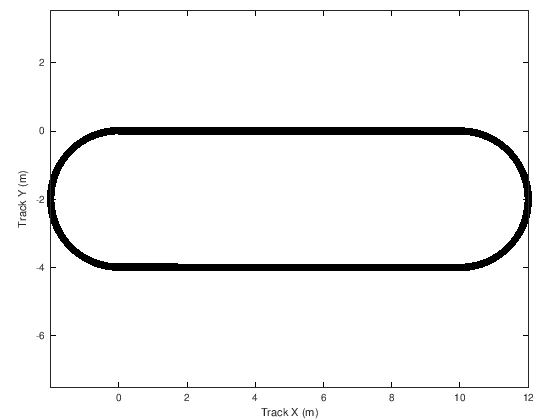

In [87]:
[S,K] = initializeTrack()
RTurn = 2;
theta_turn = -pi;
lengthStraight = 10;
K_straight = 0;
[S,K] = addStraight(S, K,lengthStraight,K_straight);
[S,K] = addTurn(S, K,RTurn,theta_turn);
[S,K] = addStraight(S, K,lengthStraight,K_straight);
[S,K] = addTurn(S, K,RTurn,theta_turn);

%look at our track
track = fillTrack(S,K);

figure
plot(track.X,track.Y,'ko')
axis equal
xlabel('Track X (m)')
ylabel('Track Y (m)')

Now that we know that our "add" functions will work together we will functionalize once again to decide that based on an angle given whether or not we should add a straight or a turn.

In [80]:
function [S,K] = StraightOrTurn(S_cur,K_cur,Length,angle)
    if angle ~= 0
        [S,K] = addTurn(S_cur, K_cur,Length,angle);
    else
        [S,K] = addStraight(S_cur, K_cur,Length,angle);
    end
end

Unit test to see if the new function works with scalar values.

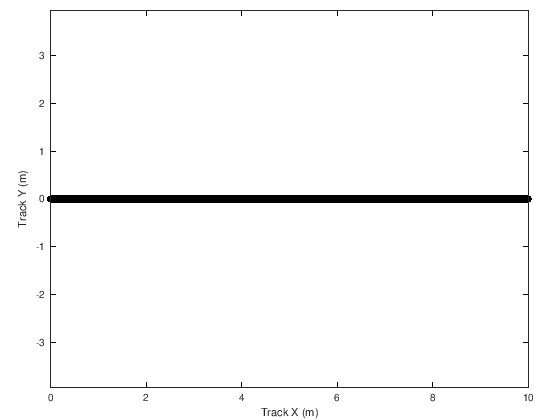

In [92]:
[S,K] = initializeTrack();
% Length = [10 5 10 1];
% angle = [0 pi 0 pi];
Length = 10;
angle = 0;
[S,K] = StraightOrTurn(S,K,Length,angle);
% for i = 1:length(angle)
%     [S,K] = StraightOrTurn(S,K,Length(i),angle(i));
% end

%look at our track
track = fillTrack(S,K);

figure
plot(track.X,track.Y,'ko')
axis equal
xlabel('Track X (m)')
ylabel('Track Y (m)')

Now we are going to put everything together. In the following buildTrack function we will create our S and K arrays by feeding in two arguments: an array for lengths, and an array for angles. The function will then produce arrays of query Station and Curviture points that will be fed to Prof Brown's fillTrack function and will produce our overall track struct. 

In [124]:
function track = buildTrack(lengths,angles)
    [S,K] = initializeTrack();
    for i = 1:length(angles)
        [S,K] = StraightOrTurn(S,K,lengths(i),angles(i));
    end
    track = fillTrack(S,K);
end

Moment of truth unit test. Feed in arrays of lengths and angles. Also plot to see if stuff looks good.

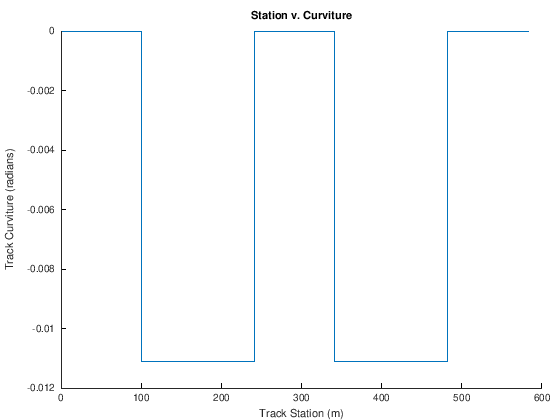

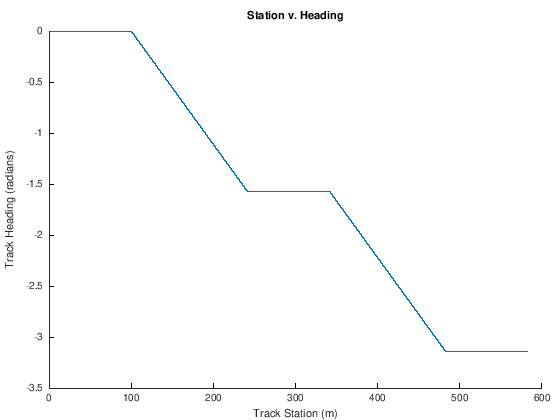

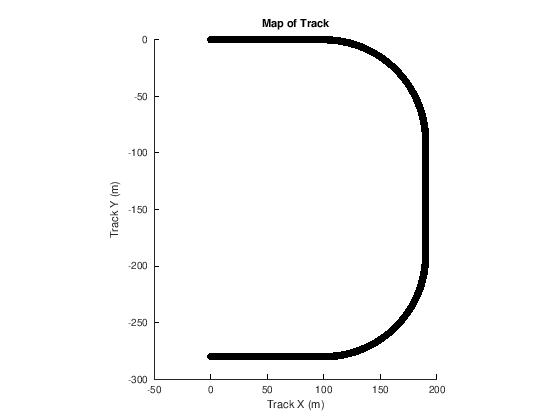

In [123]:
lengths = [100,90,100,90,100];
angles = [0,-pi/2,0,-pi/2,0];
track = buildTrack(lengths,angles);

figure(1)
hold on
title("Map of Track")
plot(track.X,track.Y,"ko")
xlabel('Track X (m)')
ylabel('Track Y (m)')
daspect([1 1 1])
hold off

figure(2)
hold on
title("Station v. Heading")
plot(track.S,track.heading)
xlabel('Track Station (m)')
ylabel('Track Heading (radians)')
hold off

figure(3)
hold on
title("Station v. Curviture")
plot(track.S,track.K)
xlabel('Track Station (m)')
ylabel('Track Curviture (radians)')
hold off

It works! We now have a way to build custom racing tracks for testing of the laptime simulator (or for making easy zumo maps). Finally, we will functionalize the plotting to save us time in the future.

In [118]:
function plts = pltTrack(track)
    figure(1)
    hold on
    title("Map of Track")
    plot(track.X,track.Y,"ko")
    xlabel('Track X (m)')
    ylabel('Track Y (m)')
    daspect([1 1 1])
    hold off
    
    figure(2)
    hold on
    title("Station v. Heading")
    plot(track.S,track.heading)
    xlabel('Track Station (m)')
    ylabel('Track Heading (radians)')
    hold off
    
    figure(3)
    hold on
    title("Station v. Curviture")
    plot(track.S,track.K)
    xlabel('Track Station (m)')
    ylabel('Track Curviture (radians)')
    hold off
end

One last unit test.

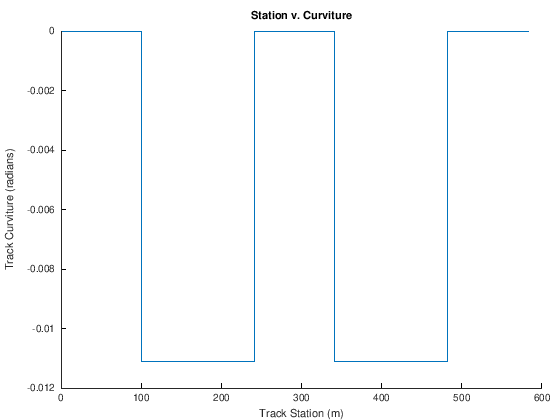

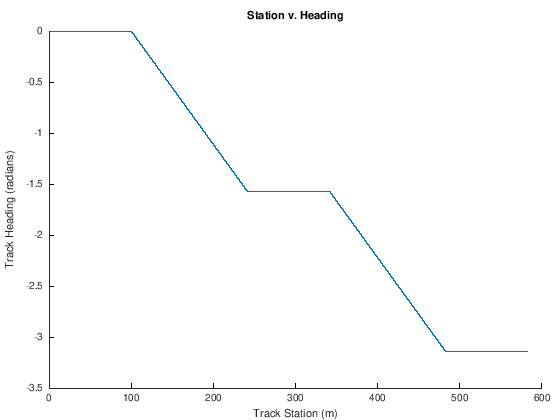

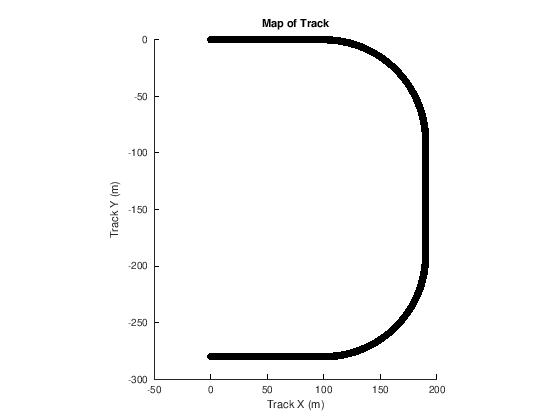

In [119]:
pltTrack(track)

# Potential Next Steps:
While an initial version of the build track simulation is complete, there is room for improvement. Here are some of the following ideas to improve this notebook and it's functionality.
1. implement a sum() function within buildTrack function in order to ensure angles add up to acceptable value of 2$\pi$ for overall track so that angles terminate correctly

2. implement some level of user feedback to ensure track terminates at initial starting point.    
    A. if user selects "yes" or "y" then the track would auto populate data need to connect first and last X,Y points and update station, curviture, and heading arrays accordingly.